<a href="https://colab.research.google.com/github/kinzahassan15/Data_Minning/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('./dow_jones_index.csv')

In [ ]:
# Convert 'date' to datetime and remove dollar sign from price columns
df['date'] = pd.to_datetime(df['date'])

price_columns = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']
for col in price_columns:
    df[col] = df[col].replace('[\\$,]', '', regex=True).astype(float)

In [ ]:
sns.set(style='whitegrid')

# EDA

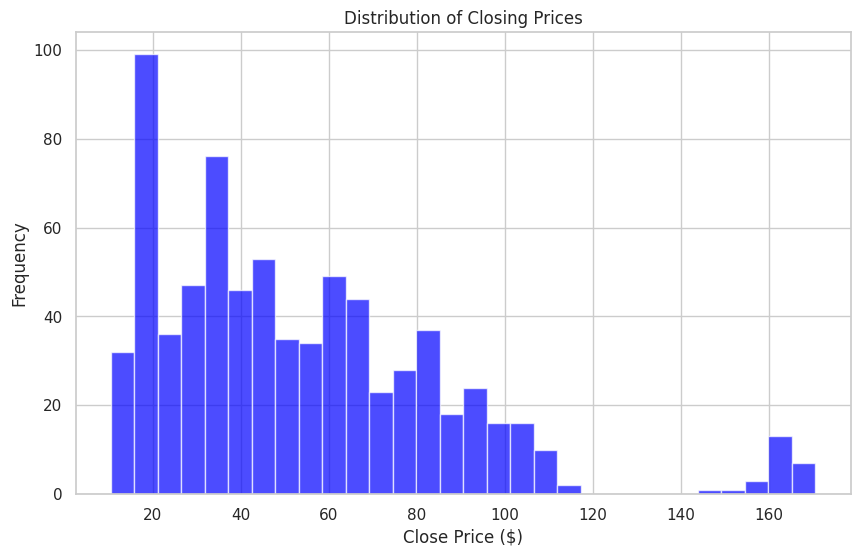

In [ ]:
# Visualization 1: Distribution of 'close' prices
plt.figure(figsize=(10, 6))
plt.hist(df['close'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price ($)')
plt.ylabel('Frequency')
plt.show()

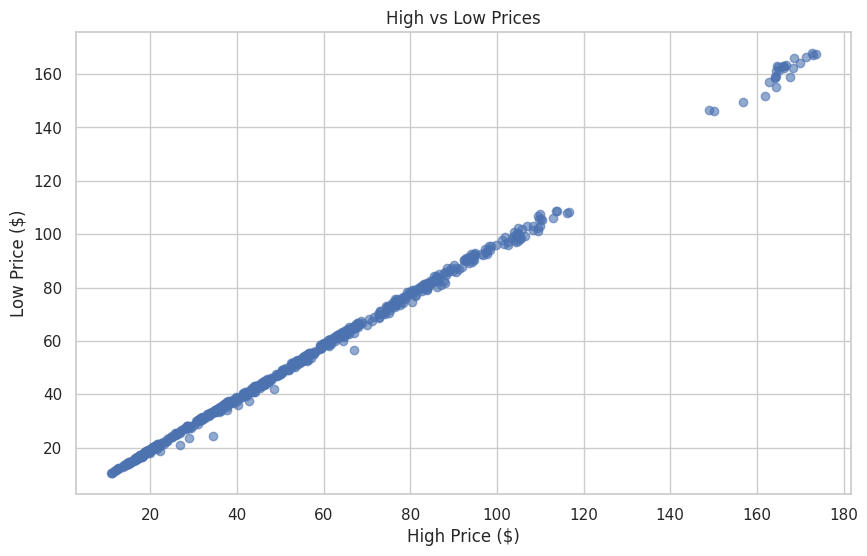

In [ ]:
# Visualization 2: Scatter plot of 'high' vs 'low'
plt.figure(figsize=(10, 6))
plt.scatter(df['high'], df['low'], alpha=0.6)
plt.title('High vs Low Prices')
plt.xlabel('High Price ($)')
plt.ylabel('Low Price ($)')
plt.show()

# Bayesian Networks

Accuracy: 0.6333333333333333


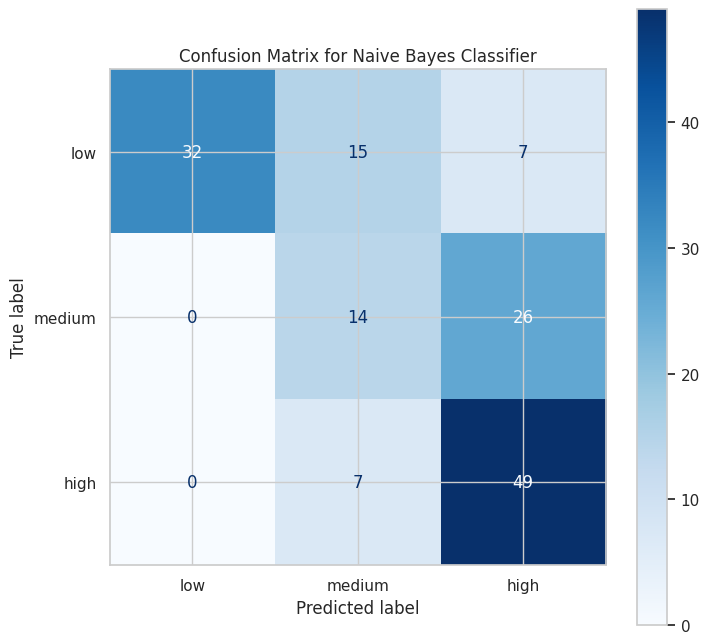

In [ ]:
# Converting 'close' prices to categorical data (low, medium, high)
close_bins = pd.qcut(df['close'], 3, labels=['low', 'medium', 'high'])

# Selecting features and target
X = df[['open', 'high', 'low', 'volume']]
y = close_bins

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluating the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy:', accuracy_nb)

# Generating the confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=['low', 'medium', 'high'])

# Displaying the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(conf_matrix_nb, display_labels=['low', 'medium', 'high']).plot(values_format='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Decision Tree Classifiers and Random Forests

### Decision Tree Classifiers

In [ ]:
# Preparing the data
# Converting 'close' prices to categorical data (low, medium, high)
close_bins = pd.qcut(df['close'], 3, labels=['low', 'medium', 'high'])

# Selecting features and target
X = df[['open', 'high', 'low', 'volume']]
y = close_bins

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Making predictions
y_pred = tree_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Displaying the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(conf_matrix, display_labels=['low', 'medium', 'high']).plot(values_format='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Accuracy: 0.9733333333333334


### Random Forests

Accuracy: 0.9933333333333333


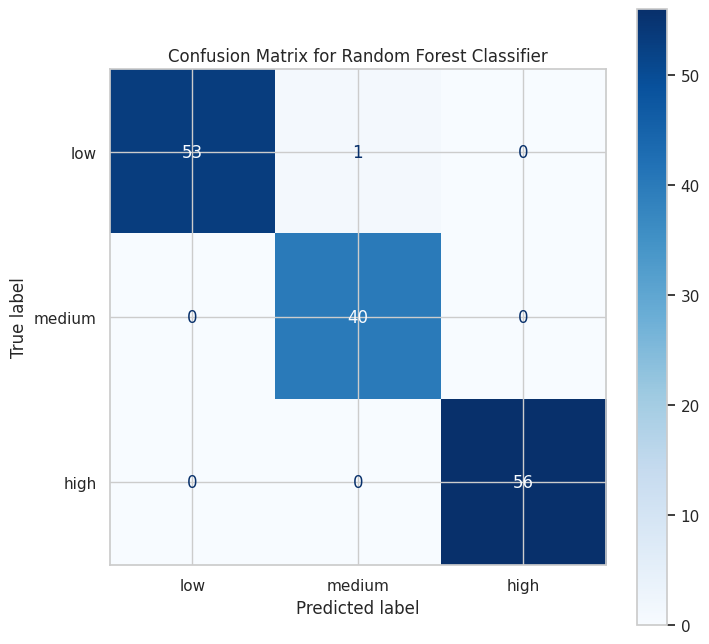

In [ ]:
# Creating and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy:', accuracy_rf)

# Generating the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=['low', 'medium', 'high'])

# Displaying the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=['low', 'medium', 'high']).plot(values_format='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Conclusion

[0.6333333333333333, 0.9733333333333334, 0.9933333333333333]


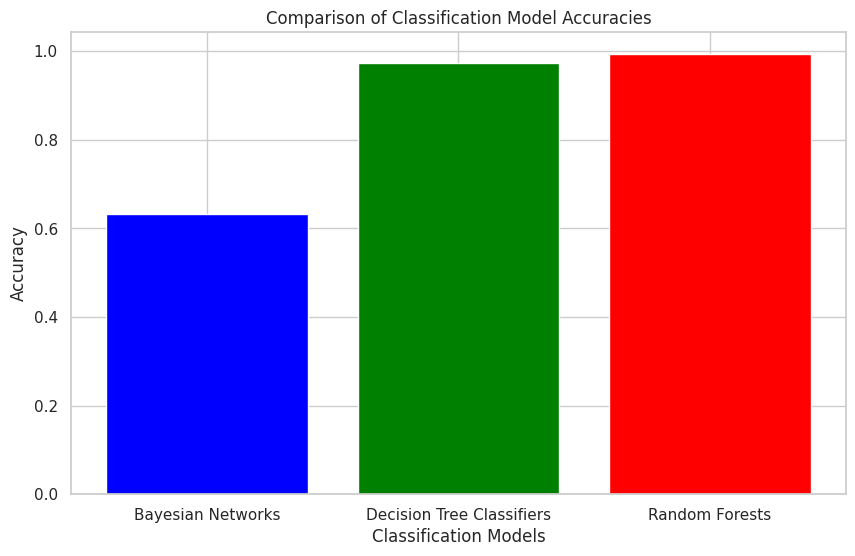

In [ ]:
# Model names
models = ['Bayesian Networks', 'Decision Tree Classifiers', 'Random Forests']

accuracies = [accuracy_nb, accuracy, accuracy_rf]

print(accuracies)

# Creating the bar chart
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
# plt.ylim(0.7, 0.8)
plt.show()